# Parameters Tutorial

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
import gettsim
from gettsim import set_up_policy_environment
from gettsim import compute_taxes_and_transfers

## What is this Notebook about?

We will take a closer look at the ```params_dict``` of GETTSIM. It is a dictionary that contains all the date-specific parameters (e.g. level of unemployment benefit) that are necessary to compute the target variables we are interested in. 

Using an example, we will take a look at the dictionary and learn how to change parameters in the dictionary to model reforms of the German Tax and Transfer System. As usual, we first need to load the parameters (and functions) for a specific date:

In [4]:
params_dict, policy_func_dict = set_up_policy_environment("2020")

In 2020, the German government pays a special child bonus of 300€ per child to households with children as a part of a stimulus package. The households will receive the special child bonus as a part of the *Kindergeld*, that we modeled in greater detail in this (LINK) notebook.

    Small Recap: Kindergeld is a child benefit that can be claimed by parents. Mainly lower-income families benefit from Ki-ndergeld. For higher-income families the tax allowances for children are more advantageous, so that they dont receive 
    Kindergeld.

We will now edit the ```params_dict``` of GETTSIM by changing the relevant parameters to model this reform:

### 1. Find the relevant parameter

You can open the params_dict by typing ```params_dict```. You will see all the parameters with all the assigned values, but it might look confusing.

To get an idea of the structure of the notebook, we will work us through the dictionary step by step. First we take a look at the ```keys``` of the ```dict```. 

In [5]:
print(*params_dict.keys(), sep="\n")

eink_st
eink_st_abzuege
soli_st
arbeitsl_geld_2
arbeitsl_geld
soz_vers_beitr
unterhalt
abgelt_st
wohngeld
kinderzuschlag
kindergeld
elterngeld


We can see the key "kindergeld". Let´s take a closer look there...

In [6]:
print(*params_dict["kindergeld"].keys(), sep="\n")

kindergeld_hoechstalter
kindergeld
kindergeld_einkommensgrenze
kindergeld_stundengrenze
datum


**kindergeld_hoechstalter** is the maximum age of a child that is entitled to *Kindergeld*

**kindergeld** is the amount of money that parents receive for their children

**kindergeld_einkommensgrenze** is the maximum annual income of a child that is still entitled to *Kindergeld*

**kindergeld_stundengrenze** is the maximum number of weekly working hours of a child that is entitled to *Kindergeld*

**jahr** and **datum** specify, when the parameters were the status of the German Tax and Transfer System

The reform we are simulating influences the amount of money that parents receive for their children. Lets take a look at the value of this parameter:

In [7]:
params_dict["kindergeld"]["kindergeld"]

{1: 204, 2: 204, 3: 210, 4: 235}

For the first and second child, the monthly *Kindergeld* is 204€. For the third child, monthly *Kindergeld* is 210€. For each additional child, *Kindergeld* is 235€.

### 2. Change the relevant parameter

Now we need to do a ```deepcopy``` of  the ```params_dict```. By deep copying, structure and content of the original and the copy will be completely isolated from each other:

In [8]:
from copy import deepcopy

params_dict_reformed = deepcopy(params_dict)

Using a loop, we add the 300€ to each entry of our new ```params_dict_reformiert["kindergeld"]["kindergeld"]```. As the parameter is defined on a monthly level, we divide 300€ by 12. (In reality, the special child bonus will be paid in two seperate payments of 200€ and 100€ in the fall of 2020.)

In [9]:
for n in params_dict_reformed["kindergeld"]["kindergeld"]:
    params_dict_reformed["kindergeld"]["kindergeld"][n] = params_dict_reformed["kindergeld"]["kindergeld"][n] + 300 / 12

Now we can check if the ```params_dict_reformed``` shows different values for the ```["kindergeld"]["kindergeld"]``` entries:

In [10]:
params_dict_reformed["kindergeld"]["kindergeld"] 

{1: 229.0, 2: 229.0, 3: 235.0, 4: 260.0}

It worked, we raised all values by 300/12.

**Remark**: In the same way, we can also add new parameters to the ```params_dict```, e.g. we could implement the special child bouns as a seperate parameter:

In [11]:
params_dict_reformed["kindergeld"]["kinderbonus"] = 300 / 12

Of course this is only useful if we edit the ```policy_func_dict``` as well. Otherwise the new parameter will not be taken into account by any function. We discuss this here (LINK)

### 3. Apply reformed parameter to simulated households

We can use the simulated data from the previous notebook (LINK) to illustrate the the impact of the reform we implemented above. For simplicity, we will only look at households with two children and two parents. 

In [12]:
df = pd.read_csv("2p_2c.csv")
df

,hh_id,tu_id,bruttolohn_m,vermögen_hh,prv_krankenv,alter,hat_kinder,kind,selbstständig,eink_selbst_m,...,vermiet_eink_m,kapital_eink_m,prv_rente_beitr_m,wohnort_ost,jahr_renteneintr,betreuungskost_m,in_ausbildung,behinderungsgrad,arbeitsstunden_w,alleinerziehend
0,0,0,1500.0,0,False,50.0,True,False,False,0.0,...,0.0,0.0,0.0,False,2100.0,0.0,False,0.0,40.0,False
1,0,0,1500.0,0,False,50.0,True,False,False,0.0,...,0.0,0.0,0.0,False,2100.0,0.0,False,0.0,40.0,False
2,0,0,NaN,0,False,10.0,False,True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,0,0,NaN,0,False,5.0,False,True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,1,1,1550.0,0,False,50.0,True,False,False,0.0,...,0.0,0.0,0.0,False,2100.0,0.0,False,0.0,40.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,129,129,NaN,0,False,5.0,False,True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
520,130,130,8000.0,0,False,50.0,True,False,False,0.0,...,0.0,0.0,0.0,False,2100.0,0.0,False,0.0,40.0,False
521,130,130,8000.0,0,False,50.0,True,False,False,0.0,...,0.0,0.0,0.0,False,2100.0,0.0,False,0.0,40.0,False
522,130,130,NaN,0,False,10.0,False,True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


This simulated dataset shows 130 households with each 2  50 year old parents and their 5 & 10 year old children. The households/tax units only vary in their income.

First, we will compute the *Kindergeld* with the unreformed parameters:

In [24]:
targets = [
        "kindergeld_m_tu",
        "eink_st_tu",
        "soli_st_tu"
          ]

result_no_reform = compute_taxes_and_transfers(
    data = df,
    params=params_dict,
    functions=policy_func_dict,
    targets=targets,
    )

result_no_reform

,eink_st_tu,kindergeld_m_tu,soli_st_tu
0,1611.323123,408,0.000000
1,1611.323123,408,0.000000
2,1611.323123,408,0.000000
3,1611.323123,408,0.000000
4,1843.015567,408,0.000000
...,...,...,...
519,45350.455800,0,2494.275169
520,45854.455800,0,2521.995169
521,45854.455800,0,2521.995169
522,45854.455800,0,2521.995169


Now we do exactly the same, but using the ```params_dict_reformed```. This is the only difference to the cell above:

In [19]:
result_reformed = compute_taxes_and_transfers(
    data = df,
    functions=policy_func_dict,
    params=params_dict_reformed,
    targets=targets
    )
result_reformed

,eink_st_tu,kindergeld_m_tu,soli_st_tu
0,1611.323123,458.0,0.000000
1,1611.323123,458.0,0.000000
2,1611.323123,458.0,0.000000
3,1611.323123,458.0,0.000000
4,1843.015567,458.0,0.000000
...,...,...,...
519,45350.455800,0.0,2494.275169
520,45854.455800,0.0,2521.995169
521,45854.455800,0.0,2521.995169
522,45854.455800,0.0,2521.995169


### 4. Visualisation / Further Analysis

Our results so far offer a good starting point to analyse the reform in futher detail, though this would lead away from the introduction into GETTSIM. Still, we can easily visualize and compare the amount of *Kindergeld* in the two different scenarios.

Therefore we reorganize our data. We create a dataframe with the total monthly income of each tax unit and the *Kindergeld* they receive with the ```params_dict_reformed``` and the ```params_dict```:

In [20]:
total_income_tu = df.groupby("tu_id")["bruttolohn_m"].sum()
total_income_tu

tu_id
0       3000.0
1       3100.0
2       3200.0
3       3300.0
4       3400.0
        ...   
126    15600.0
127    15700.0
128    15800.0
129    15900.0
130    16000.0
Name: bruttolohn_m, Length: 131, dtype: float64

In [38]:
result_reformed["tu_id"] = df["tu_id"]
result_reformed.drop_duplicates("tu_id").set_index("tu_id")

result_no_reform["tu_id"] = df["tu_id"]
result_no_reform.drop_duplicates("tu_id").set_index("tu_id")

,eink_st_tu,kindergeld_m_tu,soli_st_tu
tu_id,,,
0,1611.323123,408,0.000000
1,1843.015567,408,0.000000
2,2108.837502,408,0.000000
3,2377.984073,408,0.000000
4,2649.746369,408,0.000000
...,...,...,...
126,43838.455800,0,2411.115169
127,44342.455800,0,2438.835169
128,44846.455800,0,2466.555169


In [39]:
data_relevant = pd.DataFrame(columns = ["income"]) 
data_relevant["income"] = total_income_tu

kindergeld_no_reform = result_no_reform.drop_duplicates("tu_id").set_index("tu_id")
kindergeld_reformed = result_reformed.drop_duplicates("tu_id").set_index("tu_id")

data_relevant["Kindergeld no reform"] = kindergeld_no_reform["kindergeld_m_tu"]
data_relevant["Kindergeld reformed"] = kindergeld_reformed["kindergeld_m_tu"]

data_relevant

,income,Kindergeld no reform,Kindergeld reformed
tu_id,,,
0,3000.0,408,458.0
1,3100.0,408,458.0
2,3200.0,408,458.0
3,3300.0,408,458.0
4,3400.0,408,458.0
...,...,...,...
126,15600.0,0,0.0
127,15700.0,0,0.0
128,15800.0,0,0.0


We can illustrate the effect of the special child bonus of 2020 by plotting the *Kindergeld* of the two scenarios:

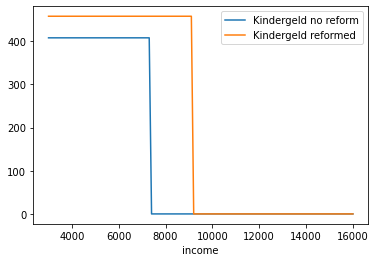

In [40]:
data_relevant.plot(x="income", y=["Kindergeld no reform", "Kindergeld reformed"])

Unsurprisingly , the special child bonus increases the amount of money that tax units receive if they are entitled to *Kindergeld*. At the same time, more tax units are entitled to *Kindergeld* as the threshold at which tax allowances become more advantageous moves up.

Of course this is a *very* basic visualisation and analysis. If we take into account basic social security (e.g. unemployment benefit) our approach would lead to wrong results. Usually *Kindergeld* is considered as income so that social security payments are lowered by the amount of *Kindergeld*. In the case of the special child bonus, recipients of social security payments receive the special child bonus on top of other payments. 

For a correct simulation of these effects it would be necessary to additionally change the ```policy_func_dict```. You can take a look at this (LINK) notebook to learn more about the ```policy_func_dict```.